In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

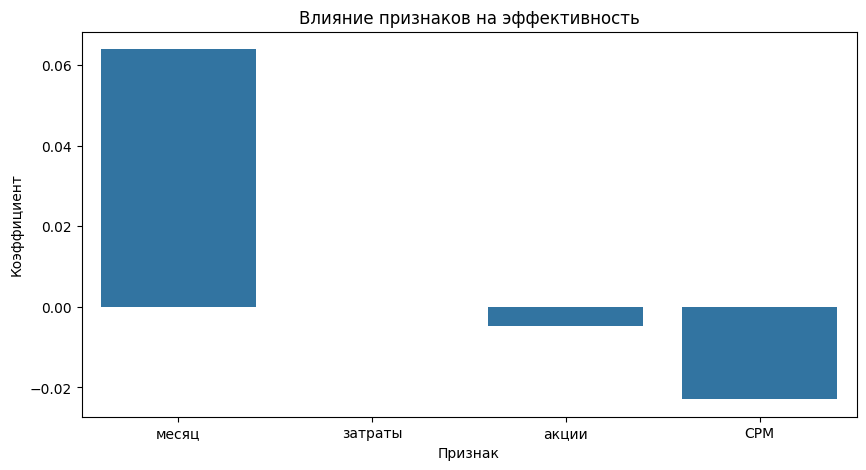

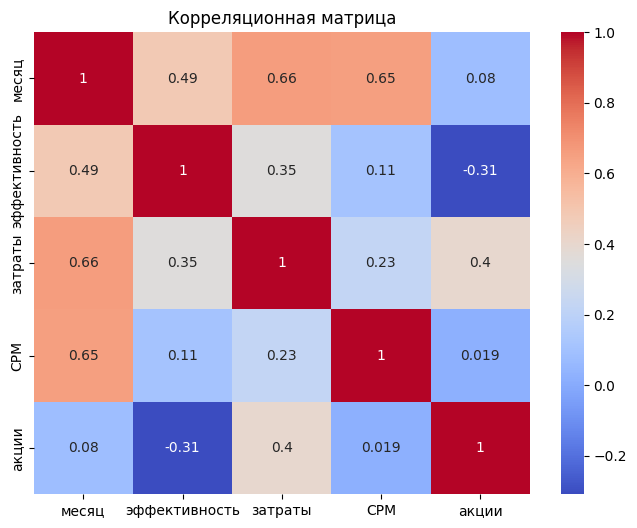

Базовые статистики модели:
R-квадрат: 45.85%

Влияние признаков:
   Признак   Коэффициент  Влияние (%)
0    месяц  6.399845e-02    69.712364
1  затраты  5.395076e-07     0.000588
2    акции -4.868642e-03    -5.303325
3      CPM -2.293595e-02   -24.983723

Пример прогноза:
Эффективность для месяца 1, затрат 4000 и акции: 2.499483387498329


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_predict_ad_effectiveness(data):
    # Подготовка данных
    X = data[['месяц', 'затраты', 'акции', 'CPM']]
    y = data['эффективность']
    Linear_model = LinearRegression()
    model = Ridge(alpha=1.0)
    model.fit(X, y)

    def predict_effectiveness(месяц, затраты, акции, CPM):
        input_data = np.array([[месяц, затраты, акции, CPM]])
        return model.predict(input_data)[0]

    # Коэффициенты влияния
    coefficients = pd.DataFrame({
        'Признак': X.columns,
        'Коэффициент': model.coef_,
        'Влияние (%)': model.coef_ / np.abs(model.coef_).sum() * 100
    })

    # Визуализация коэффициентов
    plt.figure(figsize=(10,5))
    sns.barplot(x='Признак', y='Коэффициент', data=coefficients)
    plt.title('Влияние признаков на эффективность')
    plt.show()

    # Корреляционная матрица
    correlation = data.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Корреляционная матрица')
    plt.show()

    print("Базовые статистики модели:")
    print(f"R-квадрат: {model.score(X, y):.2%}")
    print("\nВлияние признаков:")
    print(coefficients)

    return model, coefficients, predict_effectiveness

# Пример данных
data = pd.DataFrame({
    'месяц': [1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'эффективность': [1.82, 2.2, 1.92, 2.02, 1.5, 1.57, 2.14, 2.44, 2.54, 2.63, 2.72, 2.3, 2.47, 2.07,  1.88, 1.52, 2.5, 1.84, 1.57, 2.07, 2.25, 2.81, 2.31, 2.34],
    'затраты': [93324, 82036, 73799, 67615, 69036, 71857, 69272, 77667, 78252, 80113, 369632, 389611, 82798, 73503, 46501, 48883, 85865, 62107, 80062, 77412, 105657, 124142, 515040, 535520],
    'CPM': [24, 23, 24, 28, 37, 40, 34, 33, 37, 34, 41, 36, 23, 25, 29, 30, 33, 33, 30, 32, 33, 30, 26, 36],
    'акции': [63,57,55,83,99,77,29,0,64,25,111,29,22,96,58,105,62,58,89,89,40,51,151,90]
})

model, coefficients, predict_effectiveness = analyze_and_predict_ad_effectiveness(data)

# Пример использования
print("\nПример прогноза:")
print("Эффективность для месяца 1, затрат 4000 и акции:",
      predict_effectiveness(9, 306, 50, 23))



Модель с высокой точностью (нет). Получилась за счет использования полиномиальных признаков, oneHotEncoder для месяца и нормализации переменных, Модели Ridge Regression.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import pandas as pd

# Данные
data = pd.DataFrame({
    'месяц': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'эффективность': [41.66, 37.1, 38.5, 44.7, 69.2, 62.2, 45, 52, 48.2, 43.5, 41.3, 49.37,
                      38.8, 44.7, 53.92, 55, 55.7, 64.1, 72.2, 50.8, 49.3, 44.5, 49.5, 51.6],
    'затраты': [93324, 82036, 73799, 67615, 69036, 71857, 69272, 77667, 78252, 80113, 369632, 389611,
                82798, 73503, 46501, 48883, 85865, 62107, 80062, 77412, 105657, 124142, 515040, 535520],
    'CPM': [24, 23, 24, 28, 37, 40, 34, 33, 37, 34, 41, 36,
            23, 25, 29, 30, 33, 33, 30, 32, 33, 30, 26, 36],
    'акции': [63, 57, 55, 83, 99, 77, 29, 0, 64, 25, 111, 29,
              22, 96, 58, 105, 62, 58, 89, 89, 40, 51, 151, 90]
})

# Признаки
numeric_features = ['затраты', 'акции', 'CPM']
categorical_features = ['месяц']

# Трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

poly = PolynomialFeatures(degree=2, include_bias=False)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', poly),
    ('regressor', Ridge(alpha=1.0))
])

# Целевая переменная и обучающие данные
X = data[['месяц', 'затраты', 'акции', 'CPM']]
y = data['эффективность']

# Обучение
pipeline.fit(X, y)

# Получаем OneHotEncoded имена для категориальных признаков
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Объединяем числовые и категориальные признаки после предварительной обработки
all_preprocessed_features = numeric_features + list(ohe_feature_names)

# Генерируем имена полиномиальных признаков
poly_feature_names = poly.get_feature_names_out(all_preprocessed_features)

# Итоговый список всех признаков
transformed_feature_names = list(poly_feature_names)

# Выводим итоговые имена
print("Все имена признаков после преобразований:", transformed_feature_names)

# Коэффициенты модели
model_coefs = pipeline.named_steps['regressor'].coef_

coeff_df = pd.DataFrame({
    'Признак': transformed_feature_names,
    'Коэффициент': model_coefs,
    'Влияние (%)': model_coefs / np.abs(model_coefs).sum() * 100
})

# Вычисление R^2
r2 = pipeline.score(X, y)

# Вывод результата
print(coeff_df)
print(f"\nR² модели: {r2:.2%}")


Все имена признаков после преобразований: ['затраты', 'акции', 'CPM', 'месяц_2', 'месяц_3', 'месяц_4', 'месяц_5', 'месяц_6', 'месяц_7', 'месяц_8', 'месяц_9', 'месяц_10', 'месяц_11', 'месяц_12', 'затраты^2', 'затраты акции', 'затраты CPM', 'затраты месяц_2', 'затраты месяц_3', 'затраты месяц_4', 'затраты месяц_5', 'затраты месяц_6', 'затраты месяц_7', 'затраты месяц_8', 'затраты месяц_9', 'затраты месяц_10', 'затраты месяц_11', 'затраты месяц_12', 'акции^2', 'акции CPM', 'акции месяц_2', 'акции месяц_3', 'акции месяц_4', 'акции месяц_5', 'акции месяц_6', 'акции месяц_7', 'акции месяц_8', 'акции месяц_9', 'акции месяц_10', 'акции месяц_11', 'акции месяц_12', 'CPM^2', 'CPM месяц_2', 'CPM месяц_3', 'CPM месяц_4', 'CPM месяц_5', 'CPM месяц_6', 'CPM месяц_7', 'CPM месяц_8', 'CPM месяц_9', 'CPM месяц_10', 'CPM месяц_11', 'CPM месяц_12', 'месяц_2^2', 'месяц_2 месяц_3', 'месяц_2 месяц_4', 'месяц_2 месяц_5', 'месяц_2 месяц_6', 'месяц_2 месяц_7', 'месяц_2 месяц_8', 'месяц_2 месяц_9', 'месяц_2 мес

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Данные
data = pd.DataFrame({
    'месяц': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'эффективность': [41.66, 37.1, 38.5, 44.7, 69.2, 62.2, 45, 52, 48.2, 43.5, 41.3, 49.37,
                      38.8, 44.7, 53.92, 55, 55.7, 64.1, 72.2, 50.8, 49.3, 44.5, 49.5, 51.6],
    'затраты': [93324, 82036, 73799, 67615, 69036, 71857, 69272, 77667, 78252, 80113, 369632, 389611,
                82798, 73503, 46501, 48883, 85865, 62107, 80062, 77412, 105657, 124142, 515040, 535520],
    'CPM': [24, 23, 24, 28, 37, 40, 34, 33, 37, 34, 41, 36,
            23, 25, 29, 30, 33, 33, 30, 32, 33, 30, 26, 36],
    'акции': [63, 57, 55, 83, 99, 77, 29, 0, 64, 25, 111, 29,
              22, 96, 58, 105, 62, 58, 89, 89, 40, 51, 151, 90]
})

# Признаки
numeric_features = ['затраты', 'акции', 'CPM']
categorical_features = ['месяц']

# Трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

poly = PolynomialFeatures(degree=2, include_bias=False)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', poly),
    ('regressor', Ridge(alpha=1.0))
])

# Целевая переменная и обучающие данные
X = data[['месяц', 'затраты', 'акции', 'CPM']]
y = data['эффективность']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Обучение
pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = pipeline.predict(X_test)

# Оценка модели
train_r2 = pipeline.score(X_train, y_train)
test_r2 = pipeline.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

# Получаем OneHotEncoded имена для категориальных признаков
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Объединяем числовые и категориальные признаки после предварительной обработки
all_preprocessed_features = numeric_features + list(ohe_feature_names)

# Генерируем имена полиномиальных признаков
poly_feature_names = poly.get_feature_names_out(all_preprocessed_features)

# Итоговый список всех признаков
transformed_feature_names = list(poly_feature_names)

# Коэффициенты модели
model_coefs = pipeline.named_steps['regressor'].coef_

coeff_df = pd.DataFrame({
    'Признак': transformed_feature_names,
    'Коэффициент': model_coefs,
    'Влияние (%)': model_coefs / np.abs(model_coefs).sum() * 100
})

# Вывод результата
print(coeff_df)
print(f"\nR² на обучающей выборке: {train_r2:.2%}")
print(f"R² на тестовой выборке: {test_r2:.2%}")
print(f"Среднеквадратичная ошибка (MSE) на тестовой выборке: {mse:.2f}")


               Признак  Коэффициент  Влияние (%)
0              затраты    -1.503039    -1.836994
1                акции     3.841310     4.694796
2                  CPM     2.619912     3.202020
3              месяц_2    -0.557592    -0.681481
4              месяц_3     0.286521     0.350182
..                 ...          ...          ...
114  месяц_10 месяц_11     0.000000     0.000000
115  месяц_10 месяц_12     0.000000     0.000000
116         месяц_11^2    -0.411788    -0.503282
117  месяц_11 месяц_12     0.000000     0.000000
118         месяц_12^2     0.122415     0.149614

[119 rows x 3 columns]

R² на обучающей выборке: 96.23%
R² на тестовой выборке: 75.22%
Среднеквадратичная ошибка (MSE) на тестовой выборке: 8.15


# Добавил корсс-валидацию

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
import numpy as np

# Data
data = pd.DataFrame({
    'месяц': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'эффективность': [41.66, 37.1, 38.5, 44.7, 69.2, 62.2, 45, 52, 48.2, 43.5, 41.3, 49.37,
                      38.8, 44.7, 53.92, 55, 55.7, 64.1, 72.2, 50.8, 49.3, 44.5, 49.5, 51.6],
    'затраты': [93324, 82036, 73799, 67615, 69036, 71857, 69272, 77667, 78252, 80113, 369632, 389611,
                82798, 73503, 46501, 48883, 85865, 62107, 80062, 77412, 105657, 124142, 515040, 535520],
    'CPM': [24, 23, 24, 28, 37, 40, 34, 33, 37, 34, 41, 36,
            23, 25, 29, 30, 33, 33, 30, 32, 33, 30, 26, 36],
    'акции': [63, 57, 55, 83, 99, 77, 29, 0, 64, 25, 111, 29,
              22, 96, 58, 105, 62, 58, 89, 89, 40, 51, 151, 90]
})

# Features
numeric_features = ['затраты', 'акции', 'CPM']
categorical_features = ['месяц']

# Preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

poly = PolynomialFeatures(degree=2, include_bias=False)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', poly),
    ('regressor', Ridge())
])

# Target and features
X = data[['месяц', 'затраты', 'акции', 'CPM']]
y = data['эффективность']

# Grid search for the best alpha
param_grid = {'regressor__alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Best alpha
best_alpha = grid_search.best_params_['regressor__alpha']
best_score = grid_search.best_score_

# Cross-validated R^2 scores with the best alpha
pipeline.set_params(regressor__alpha=best_alpha)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Retrain with best alpha for coefficients
pipeline.fit(X, y)

# Extract OneHotEncoded feature names
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric and categorical feature names
all_preprocessed_features = numeric_features + list(ohe_feature_names)

# Generate polynomial feature names
poly_feature_names = poly.get_feature_names_out(all_preprocessed_features)

# Final feature names
transformed_feature_names = list(poly_feature_names)

# Coefficients
model_coefs = pipeline.named_steps['regressor'].coef_

coeff_df = pd.DataFrame({
    'Признак': transformed_feature_names,
    'Коэффициент': model_coefs,
    'Влияние (%)': model_coefs / np.abs(model_coefs).sum() * 100
})

# Output results
print(coeff_df)
print(f"\nЛучшее значение alpha: {best_alpha}")
print(f"Среднее R² на кросс-валидации: {np.mean(cv_scores):.2%}")
print(f"R² для каждого фолда: {cv_scores}")
print(f"Лучший R² (из GridSearchCV): {best_score:.2%}")


               Признак  Коэффициент  Влияние (%)
0              затраты    -2.375908    -2.173674
1                акции     4.351378     3.980996
2                  CPM     2.372544     2.170597
3              месяц_2    -0.590834    -0.540543
4              месяц_3     0.982620     0.898981
..                 ...          ...          ...
114  месяц_10 месяц_11     0.000000     0.000000
115  месяц_10 месяц_12     0.000000     0.000000
116         месяц_11^2    -0.355544    -0.325281
117  месяц_11 месяц_12     0.000000     0.000000
118         месяц_12^2     0.091757     0.083947

[119 rows x 3 columns]

Лучшее значение alpha: 0.1
Среднее R² на кросс-валидации: -11.37%
R² для каждого фолда: [ 0.60894221 -0.64445259  0.06959798 -0.73592051  0.13357901]
Лучший R² (из GridSearchCV): -11.37%


# Добавил множественное разбиение. Результат ухудшился, мб проблема в том что Теперь встречается много неизвестных категорий. Можно пофиксить позже

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Данные
data = pd.DataFrame({
    'месяц': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'эффективность': [41.66, 37.1, 38.5, 44.7, 69.2, 62.2, 45, 52, 48.2, 43.5, 41.3, 49.37,
                      38.8, 44.7, 53.92, 55, 55.7, 64.1, 72.2, 50.8, 49.3, 44.5, 49.5, 51.6],
    'затраты': [93324, 82036, 73799, 67615, 69036, 71857, 69272, 77667, 78252, 80113, 369632, 389611,
                82798, 73503, 46501, 48883, 85865, 62107, 80062, 77412, 105657, 124142, 515040, 535520],
    'CPM': [24, 23, 24, 28, 37, 40, 34, 33, 37, 34, 41, 36,
            23, 25, 29, 30, 33, 33, 30, 32, 33, 30, 26, 36],
    'акции': [63, 57, 55, 83, 99, 77, 29, 0, 64, 25, 111, 29,
              22, 96, 58, 105, 62, 58, 89, 89, 40, 51, 151, 90]
})

# Признаки
numeric_features = ['затраты', 'акции', 'CPM']
categorical_features = ['месяц']

# Трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

poly = PolynomialFeatures(degree=2, include_bias=False)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', poly),
    ('regressor', Ridge(alpha=1.0))
])

# Целевая переменная и обучающие данные
X = data[['месяц', 'затраты', 'акции', 'CPM']]
y = data['эффективность']

# Repeated Random Train-Test Split
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)

# Сохранение результатов
r2_scores = []
mse_scores = []

for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Обучение
    pipeline.fit(X_train, y_train)

    # Предсказания
    y_pred = pipeline.predict(X_test)

    # Метрики
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Итоговые метрики
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)

print(f"Средний R² по разным разбиениям: {mean_r2:.2%}")
print(f"Средняя MSE по разным разбиениям: {mean_mse:.2f}")


Средний R² по разным разбиениям: 13.75%
Средняя MSE по разным разбиениям: 58.03


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

Summary of Recommendations
Start simple with a linear or SARIMAX model incorporating Ad Spend, CPM, and seasonality (via month or cyclical features).
Add features like lagged variables, conversions, or CTR if available. Consider including channel-level breakdowns if it adds predictive power.
Use regularization to prevent overfitting and help with feature selection.
Evaluate model stability over multiple time splits and through permutation importance or SHAP values.
Refine iteratively, experimenting with more complex models (Random Forest, Prophet) if necessary.

Из насущного: попробовать сделать месяц цикличным, убрать затраты, попробовать ROAS еще раз, попробовать другие модели. Из менее насущного: экпортировать tripplewhale по дням, чтобы было больше наблюдений